# Investigating a TMDB Dataset

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

> This data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue. The budget and revenue of the associated movie in terms of 2010 dollars, accounting for inflation over time. However alot of the values in different columns are missing and other column values need to be separated into other columns to allow a more accurate and insightful analysis.


### Analysis Questions
>**Question 1:**
Analyzing movies with high revenues: a) is there a relation ship between release date, specifically release month, and high revenues? b) are movies with high popularity score the same movies with high revenues? c)  Are there some specific production compnies that are associated with high revenues? e) is there a specific actor that is involved with high revenue movies? f) are certain directors responsible for more popular movies than others? g) Do movies with high budgets necessrily have high revenues?

>**Question 2:**
Analyzing movie genres vs popularity trends over the years: a) are the popular genres different from one year to another? b) what are the most popular genres through out the years? 

In [1]:
#importing all packages here

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

> In this section, the data will be loaded, checked for cleanliness, and then cleaned your dataset for analysis.

### General Properties
> Initial examinition of dataset contents and nature of values shall allow us to decide the most suitable ways to handle the data and prepare it for desired analysis techniques.

In [2]:
# Loading dataset into the dataframe we will start working with
df = pd.read_csv('tmdb-movies.csv')

In [3]:
# inspecting the data by viewing the first row
df.head(1)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09


In [4]:
df.info() # displaying general information about our data set

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

>A quick view of the dataframe information summary shows some missing values in columns like imdb_id, cast, homepage, director, tagline and some data types that needs to be fixed for better handling.

In [5]:
df.describe() # provides general statistical description for data set

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


>Intial data description shows some values that doesn't make sense like the max runtime is 900 mins and min runtime is 0, which can't be right. Also it seems some data may be inacurate, missing or inapproperiately formated.

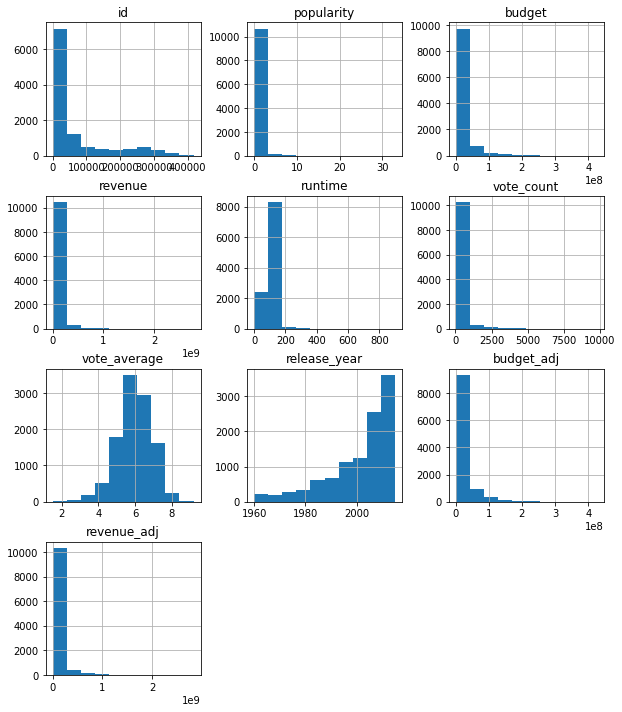

In [6]:
# taking a general look at data distribution using histograms
df.hist(figsize = (10, 12));

In [7]:
# checking for duplicate rows
df.duplicated().sum()

1

### Section Summary
>In conclusion after inspecting the general properties of data frame, our data cleaning process next will consist of:
1. removing columns that won't be relevant for data analysis
2. removing duplicated rows
3. handeling missing values
4. fixing data types to better suit anaylsis
5. handling outliers or nonsensical values


### Data Cleaning
> In this section will be carrying out the necessary operations to implement the steps mentioned in the last section's conclusion.

In [8]:
# dropping specific column names from data set
df.drop(['imdb_id', 'homepage', 'tagline', 'overview', 'keywords'], axis =1, inplace = True)

>In the cell above the columns 'imdb_id', 'homepage', 'tagline', 'overview' and 'keywords' has been dropped as they are irrelavent for our analysis. They contain string values that will not provide any additional value relative to the scope of this analysis.

In [9]:
# dropping duplicated rows from data set
df.drop_duplicates(inplace = True)
df.shape

(10865, 16)

>In the cell above the duplicated row has been removed. The shape of the dataframe now has become 10865 rows and 21 columns.

In [10]:
df['release_date'] = pd.to_datetime(df['release_date']) #changes data type from string to datetime

>converted release_date column values type from string to datetime for convience.

In [11]:
# filtering data frames creating 2 new ones
df_no_rev = df[df.revenue_adj == False] 
df_with_rev = df[df.revenue_adj != False]

>The revenue_adj column, which will be our reference revenue column in the analysis since its values has been adjusted to
account for inflation giving 2010 US dollars equivelant values; has 6016 values input as 0 which will affect the quality of
the result, hence the dataframe has been split into 2 frames: 'df_with_rev' which contains all data with valid revenue inputs and 'df_no_rev' which contains all the data with no corresponding valid revenue input.

In [12]:
# dropping rows with NaN values in the columns specified
df_with_rev = df_with_rev.dropna(subset=['production_companies', 'cast', 'director'])
df_with_rev.shape

(4750, 16)

>After filteration there are 4849 rows remaining with valid revenue input. In the new dataframe 96 rows were missing production 
company values and an addititional 2 rows were missing cast values, 1 row was missing director value as well as had abnormal revenue/budget inputs, so these rows also got dropped with makes the current shape of our 'df_with_rev' dataframe (4750 rows by 16 columns) with no missing values.

In [13]:
df_with_rev.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,4750.000000,4750.000000,4.750000e+03,4.750000e+03,4750.000000,4750.000000,4750.000000,4750.000000,4.750000e+03,4.750000e+03
mean,44390.324842,1.061915,3.012598e+07,9.099524e+07,108.148842,444.832211,6.150779,2000.828211,3.582289e+07,1.173732e+08
std,72411.653863,1.365645,4.074516e+07,1.632905e+08,21.109376,812.642537,0.796427,11.627617,4.396234e+07,2.002779e+08
min,5.000000,0.001783,0.000000e+00,2.000000e+00,15.000000,10.000000,2.100000,1960.000000,0.000000e+00,2.370705e+00
25%,8132.750000,0.401945,2.000000e+06,8.501551e+06,95.000000,50.000000,5.600000,1994.000000,2.921208e+06,1.163858e+07
50%,11975.500000,0.694424,1.563747e+07,3.331677e+07,105.000000,153.000000,6.200000,2004.000000,2.103337e+07,4.584735e+07
75%,43919.750000,1.226349,4.000000e+07,1.015876e+08,118.000000,446.000000,6.700000,2010.000000,5.040280e+07,1.349884e+08
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,705.000000,9767.000000,8.400000,2015.000000,4.250000e+08,2.827124e+09


>Reinspecting the data shows there are budget values input as 0 as well as extra long runtime values which need to be handled.

In [14]:
# dropping rows that has runtime values of 338 mins or greater
df_with_rev.drop(df_with_rev.query('runtime >= 338').index, inplace = True)
df_with_rev.shape

(4748, 16)

>Another 2 rows dropped which were miniseries entries with run time 338 mins and 705 mins , not movies.

In [15]:
df_rev_bud = df_with_rev.query('budget_adj != 0') # a new data frame for all rows with valid budget values
df_rev_bud.shape

(3804, 16)

>A new dataframe created to includes all relevant budget and revenue values that will be used for budget related analysis.

In [16]:
df_rev_bud.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,3804.000000,3804.000000,3.804000e+03,3.804000e+03,3804.000000,3804.000000,3804.000000,3804.000000,3.804000e+03,3.804000e+03
mean,40039.480547,1.203960,3.761315e+07,1.090018e+08,109.291009,534.290221,6.170557,2001.226866,4.472679e+07,1.387522e+08
std,67594.571467,1.480724,4.232616e+07,1.773122e+08,19.498814,883.836700,0.792541,11.330212,4.489078e+07,2.170143e+08
min,5.000000,0.010335,1.000000e+00,2.000000e+00,15.000000,10.000000,2.200000,1960.000000,9.693980e-01,2.370705e+00
25%,5924.750000,0.470645,1.000000e+07,1.435081e+07,96.000000,74.000000,5.700000,1995.000000,1.354637e+07,1.925985e+07
50%,11252.500000,0.811020,2.500000e+07,4.621892e+07,106.000000,209.000000,6.200000,2004.000000,3.038730e+07,6.293447e+07
75%,38576.000000,1.387380,5.000000e+07,1.261064e+08,119.000000,584.250000,6.700000,2010.000000,6.087715e+07,1.658074e+08
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,248.000000,9767.000000,8.400000,2015.000000,4.250000e+08,2.827124e+09


>Intial inspection of the final dataframe created has valid values for all relevant columns now.

In [17]:
def expand_column(df, column_name, new_labels):
    
    """ expand column funcution takes 3 arguments:
    - df = name of dataframe
    - column_name =  specific column name to expand
    - new_labels = a list of the new names of the columns created after expansion
    - returns: a new data drame consisting of the one input in arguments plus the new columns with new names"""
    
    # creates a dataframe containing the columns created from splitting all string values in "column_name" at the "|" sign
    df_new = df[column_name].str.split('|', expand =True) 
    df_new.columns = new_labels # assignes the names in a list to the label names of the new columns created
    df = df.join(df_new) # joins the dataframe of new columns with the old one in input
    df.drop(column_name,axis = 1, inplace = True) # drops the original column that had the values now seprated into new columns
    
    return df # returns dataframe

>The function above splits the string values in a specific column and puts each value from the split string in a specific new column. It then takes input of a list of labels to assign as the new columns names. It also drops the old column whose values got split as it would no longer be needed. It then returns the resulting new data frame.

In [18]:
prod_comp_names = ['prod_comp1', 'prod_comp2', 'prod_comp3', 'prod_comp4', 'prod_comp5'] # list of new column names
df_with_rev = expand_column(df_with_rev, 'production_companies', prod_comp_names ) # assigns the new df to the desired variable

>In the previous cell, the dataframe 'df_with_rev' was modified to contain the separated production companies names using the function we created, as many movies were co-produced by multiple companies at once, not just one company. Also, the old 'production_companies' column has been dropped since we now we have the seprated entries of its values with better accessibilty. This shall allow us to explore the possible associations between certain production companies and other properties later in our analysis.

In [19]:
genres_names = ['genre1', 'genre2', 'genre3', 'genre4', 'genre5'] # list of new column names
df_final = expand_column(df_with_rev, 'genres', genres_names) # assigns the new df to the desired variable name

>The same steps done with production companies column has been repeated with the genres column to produce our final data frame
for the EDA step. Now the shape of our date frame is 4748 rows and 29 columns.

In [20]:
actors_names = ['actor1', 'actor2', 'actor3', 'actor4', 'actor5'] # list of new column names
df_final_cast = expand_column(df_final, 'cast', actors_names) # assigns the new df to the desired variable name

In [21]:
df_final_cast.shape

(4748, 28)

In [22]:
df_final_cast.drop(['actor4', 'actor5'],axis = 1, inplace = True) # dropping unneeded actor name columns
df_final_cast.shape # shows shape of the dataframe created

(4748, 26)

>The same step has been repeated the cast column but also removed the last 2 actor columns created to keep only the main 3 actors in our dataframe, incase we needed to use main 3 actors for analysis. The shape of this dataframe is 4748 rows 31 and columns.

### Section conclusion 
>**In this data cleaning section we did the following:**
   1. Dropped the columns that won't be relevant for our analysis
   2. Removed duplicated rows
   3. The 'release_year' column data type has been changed from a string type to datetime  type
   4. Removed runtime outliers that turned to be mini series not movies once googled the names related online
   5. Created 3 data frames that will be used in the EDA step: A) 'df_final' dataframe that includes all valid revenue
        values, separated productions companies names and genres. B) 'df_bud_rev' dataframe that includes all valid budget             value as well as all valid revenue values. c)An additional data frame called 'df_final_cast' has been created in case             actor based analysis needed to be conducted.

<a id='eda'></a>
## Exploratory Data Analysis

> In this section we will investigate the dataset through calclating statistics and creating visualizations for the dataframes prepared in the previous sections.



> Also, we will have two main questions to investigate and generate insights for from several angles in attempt to reach logical conclusions that can be considered as useful and also makes sense.


### Research Question 1 
>What relationships exist between high revenue generating movies and other movie properties?

>First, take a look at some simple general statistics about our dataframe:

In [23]:
df_final.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,4748.000000,4748.000000,4.748000e+03,4.748000e+03,4748.000000,4748.000000,4748.000000,4748.000000,4.748000e+03,4.748000e+03
mean,44330.116891,1.062137,3.013488e+07,9.100706e+07,107.974726,444.946293,6.150379,2000.826243,3.583418e+07,1.173901e+08
std,72307.139846,1.365890,4.075101e+07,1.633189e+08,18.962865,812.789683,0.796142,11.629304,4.396777e+07,2.003123e+08
min,5.000000,0.001783,0.000000e+00,2.000000e+00,15.000000,10.000000,2.100000,1960.000000,0.000000e+00,2.370705e+00
25%,8121.250000,0.401865,2.000000e+06,8.516873e+06,95.000000,50.000000,5.600000,1994.000000,2.935218e+06,1.164123e+07
50%,11974.500000,0.694914,1.563747e+07,3.331677e+07,105.000000,153.000000,6.200000,2004.000000,2.103337e+07,4.584735e+07
75%,43919.250000,1.226872,4.000000e+07,1.015725e+08,118.000000,446.500000,6.700000,2010.000000,5.045652e+07,1.348632e+08
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,254.000000,9767.000000,8.400000,2015.000000,4.250000e+08,2.827124e+09


In [24]:
def visualize(df, visual , titles, xlab, ylab, clr, lgnd, xticks):
    
    """ Visualize function creates charts and plots for dataframes. It takes eight arguments:
    - df = dataframe name to be used
    - visual = the type of plot to be created, e.g: line , bar, hist etc.
    - titles = the title of the plot to be displayed
    - xlab = x-axis label
    - ylab = y-axis label
    - clr = color of the line or bars used on graph
    - lgnd = the legend describing the data used in the graph
    - xticks = list of names of the points to displayed on the x-axis
    - returns a plot with the previously mentioned specifcations and characteristics"""
    
    figure = df.plot(kind = visual, color = clr, grid =True, figsize = (8,6), rot = 0) # rotation of xtick lables = 0 degrees
    plt.ylabel(ylab, fontsize =12) # displays y-axis label
    plt.xlabel(xlab,fontsize =12) # displays x-axis label
    plt.title(titles, fontsize =16) # displays plot title
    locations = np.arange(len(df)) # creates a numpy array equal to the length of dataframe to be used as locations for xticks
    labels = xticks # list of x-axis point labels
    plt.xticks(locations, labels) # displays the labels provided on access at the locations specified
    plt.legend([lgnd]) # displays plot legends
    
    return figure

>The above is a function that will allow us to plot different types of charts to visualize our analysed statistics while avoiding code repetition.

In [25]:
df_final['release_month'] = df_final.release_date.dt.month # extracts month from the release date and adds it to a new column

In [26]:
# groups data by release month and shows the number of movies released for every month
df_month = pd.DataFrame(df_final.groupby('release_month').revenue_adj.count())
df_month

,revenue_adj
release_month,
1,287
2,316
3,364
4,338
5,360
6,404
7,374
8,424
9,593


>The above table shows the number of movies released within each individual month of the year.

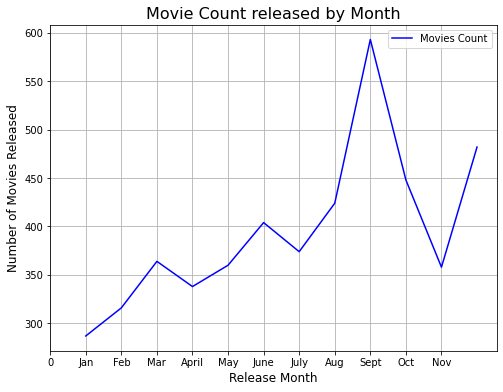

In [27]:
ticks = ['0', 'Jan', 'Feb', 'Mar', 'April', 'May', 'June', 'July', 'Aug', 'Sept', 'Oct','Nov'] # x-axis labels list

# visualize function creates a plot for the data in df_month dataframe from the previous step
visualize(df_month, 'line','Movie Count released by Month','Release Month', 'Number of Movies Released', 'b',\
          'Movies Count', ticks); 

>From the chart above it is clear that the majority of movies in our data were released in September, followed by December and October.

In [28]:
# groups data by release momth then shows the mean revenue generated by movies released on a specific month
df_month_mean = pd.DataFrame(df_final.groupby('release_month').revenue_adj.mean())
df_month_mean

,revenue_adj
release_month,
1,6.043833e+07
2,7.420432e+07
3,1.115630e+08
4,9.358590e+07
5,1.712964e+08
6,1.997173e+08
7,1.564145e+08
8,7.661652e+07
9,5.180438e+07


>The above table shows the mean adjusted revenue for all the movies released during each individual month of the year.

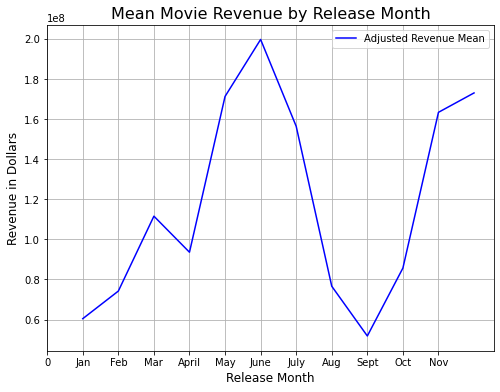

In [29]:
ticks = ['0', 'Jan', 'Feb', 'Mar', 'April', 'May', 'June', 'July', 'Aug', 'Sept', 'Oct','Nov'] # x-axis labels list

# visualize function and creates a plot for the data in df_month_mean dataframe from the previous step
visualize(df_month_mean, 'line','Mean Movie Revenue by Release Month','Release Month', 'Revenue in Dollars', 'b',\
          'Adjusted Revenue Mean', ticks); 

>The chart above shows that the highest revenue mean was achieved by movies released in the month of June, followed by those released on December and May, which are not exactly the same months with the highest movie release counts. This may suggest that movies released during holiday seasons are more likely to generate higher revenues, as May and June are right about the time when school holidays start, and it also coincides with summer season; while December has one of the most popular holidays in the world which is the Christmas holidays.

In [30]:
def popularity_value(number_of_movies):
    
    """popularity_value function generates information and a plot for the relation ship between revenue and popularity for the
     specified number of top movies provided in arguments, from the existing data frame. Takes one argument:
    - number_of_movies =  The number of top movies to extract from the top movies list for both popularity score and revenue
    - returns a plot showing popularity vs revenue for the top number of movies provdided from the dataframe of top popular
    movies as well as the top movies on the top revenue generatng list"""
    
    top_popular = df_final.nlargest(number_of_movies, 'popularity') # creates dataframe of movies with top popularity score
    top_revenue = df_final.nlargest(number_of_movies, 'revenue_adj') # creates dataframe of movies with top revenue values
    rich_and_popular = [] # list of movies that are on both list (interscection values)
    popular_and_poor= [] # list of movies that are on top popular list but not on the top revenues list
    for movie in top_popular.original_title: # for loop to append values to the correct list 
        if movie in list(top_revenue.original_title) :
            rich_and_popular.append(movie)
        else:
            popular_and_poor.append(movie)
            
    colors = top_popular.vote_average # colors of markers on plot represent the average vote score received by movie
    
    x = top_popular.popularity # x-axis represent popularity scores on plot
    y = top_popular.revenue_adj # y-axis represent revenue generated on plot
    
    # size of marker 's' is propotional to the vote count received by movie. It is divided by 10 to scale maker size down
    #  as it would too large on plot with the whole values at hand. Marker shape is default (circle)
    figure = plt.scatter(x, y, alpha = 0.7, c=colors, s=top_popular.vote_count/10); 
    
    x1 = top_revenue.popularity # x-axis values
    y1 = top_revenue.revenue_adj # y-axis values
    figure1 = plt.scatter(x1, y1, marker='s', alpha = 0.4, c=colors, s=top_revenue.vote_count/10); # marker shape is square
    
    plt.rcParams["figure.figsize"] = (10, 8) # modifies generated figure size
    plt.ylabel('Adjusted Revenue', fontsize =12) # generates the y-axis label
    plt.xlabel('Popularity Score',fontsize =12) # generates the x-axis label
    plt.title('Revenues Generated by Top Popular Movies', fontsize =14) # generates the title of the figure
    plt.legend(['Movies on Top Popular List','Movies on Top Revenue List']) # generates the legend
    plt.colorbar(); # generates a color bar as a key refernce to marker color and the associated avergae vote score
    
    message = "There are {} popular movies that are also in the top {} revenue generating movies list, and there are {} top\
    revenue generating movies that are not in the top {} popular movies list.".format(len(rich_and_popular),number_of_movies, \
                                                                                    len(popular_and_poor), number_of_movies)
    return print(message), figure, figure1

>In the previous cell, a function was created to check if there is a strong relationship between popularity and high revenues. The function returns a scatter plot that allows us to explore four dimensions for each movie on the plot: 
1. Its popularity score based on it position relative to the X-axis. 
2. The revenue it generate based on its position relative to the Y-axis. 
3.The size of the marker indicates the number of votes it received (the bigger the marker the larger the amount of votes received and vice versa). 
4. The color of the marker represents the average vote score for the movie, relative to the color bar reference on the right hand side of the plot (the lighter the marker's color the higher the average vote score received and vice versa). 

Also, the shape of the marker indicates which dataframe that movies belongs to.

There are 40 popular movies that are also in the top 100 revenue generating movies list, and there are 60 top    revenue generating movies that are not in the top 100 popular movies list.


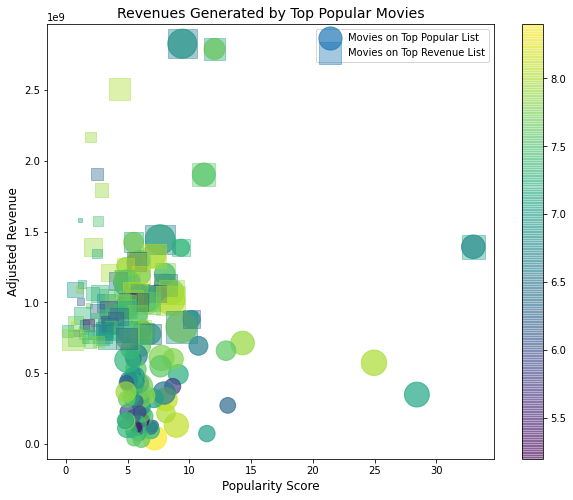

In [50]:
# using popularity value function to generate information and plot the top 100 movies in terms of popularity and 
# in terms of revenue
popularity_value(100);

>The function takes in a number of movies to analyze, then returns the top equivelant number in terms of popularity and generated revenue with a plot to show the distribution. First the function examins the top 100 movies (100 is little more than 2% of the number of movies in our data frame), and suprisingly turns out only 40 of the top popular movies were also among the top 100 revenue generating movies (40% ratio); this indicates that the popularity score on the provided data doesn't really project a strong positive relationship between high popularity and high revenue scores when considering the top 2%.

There are 735 popular movies that are also in the top 1200 revenue generating movies list, and there are 465 top    revenue generating movies that are not in the top 1200 popular movies list.


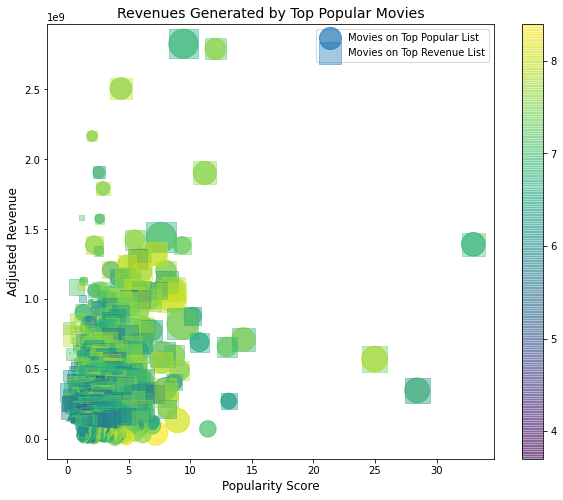

In [32]:
# using popularity value function to generate information and plot the top 1200 movies in terms of popularity and 
# in terms of revenue
popularity_value(1200);

>However, when increased the sample size inorder to consider the top 1200 movies, which is a little more than the top 25% of the number of movies in our data set, we will find 735 of the top popular movies were also among the top 1200  revenue generating movies (61.25% ratio), which means that the ratio increased by almost the same difference between the ratios for the top 100 movies (20% difference). This suggests that the relationship between high popularity and high revenue scores gets positively stronger when increasing the number of movies in the plot, as shown when considering the top 25% of movies in our data frame.

>Also it can be noticed from the scatter plots that the majority of movies with low popularity score didn't generate high revenues, but it also shows that  there are a few movies that have relatively low popularity score while still generating high revenues.

>In conculsion, the popularity scores of movies in this data set cannot be used as a reliable metric to predict if a movie is a high reveniue generating movie.

In [33]:
def top_grossing(group, num_of_movies, num_of_top_group):
    
    """top_grossing function displays a list of the top names of a certain group, who have a minimum threshold 
    of movies on the dataframe containing the movies with revenues higher than the mean revenue value, as well as the amount of
    movies each name on that list is associated with. It takes three argumens:
    - group = group of names to consider, could be directors, production companies, actors or genres
    - num_of_movies = the minimum number of movies that one name from the determined group should have on the above mean list
    - num_of_top_group = number of names to display from the num_of_movies list """
    
    mean_rev = df_final.revenue_adj.mean() # mean revenue generated by movies on our dataframe
    above_mean_rev = df_final_cast.query('revenue_adj >= {}'.format(mean_rev)) # dataframe of movies scoring above mean revenue
    
    # dataframe with minimum number of movies(num_of_movies input) on above_mean_ rev dataframe
    top_grossing = above_mean_rev[group].value_counts()[lambda x: x >= num_of_movies]
    
    count = top_grossing.count() # counts the names on the top_grossing list
    names = top_grossing[np.arange(num_of_top_group)] # creates a list of the desired number of names (num_of_top_group) to show
    
    message = 'The number of {} who made movies with higher revenues than the mean revenue value, and has {}\
    or more movies in the above mean list is {}. The top {} {} names are:'.format(group,num_of_movies, count,\
                                                                                            num_of_top_group, group),names
    return message

>In the cell above,a function has been created that makes a list consisting of the input group (like directors or actors from any of the actors name in the df_final_cast dataframe columns we created earlier), the minimum number of movies with value above mean revenue value and the number of names to display in the top list.

In [34]:
# top_grossing function used to display the top 5 directors names who has at least 5 movies on the list of movies that generated
# revenues above the mean revenues value, and how many movies each of these names has on that list

top_grossing('director',5,5) 

('The number of director who made movies with higher revenues than the mean revenue value, and has 5    or more movies in the above mean list is 59. The top 5 director names are:',
 Steven Spielberg    24
 Robert Zemeckis     13
 Ron Howard          12
 Clint Eastwood      12
 Tim Burton          11
 Name: director, dtype: int64)

>For directors, turns out there are only 59 directors who made 5 or more movies that generated more revenue than our mean revenue value. However that also indicates that some directors may be more associated with high grossing movies than others, espicially when we look at the top 5 director names on the list. Each of these directors created more than 10 movies that grossed higher than our mean revenue value; so if you are producing a movie directed by 'Steven Spielberg' for example, chances are you are going to make millions !

In [35]:
# top_grossing function used to display the top 5 production companies names who has at least 5 movies on the list of movies 
# that generated revenues above the mean revenues value, and how many movies each of these names has on that list

top_grossing('prod_comp1',5,5)

('The number of prod_comp1 who made movies with higher revenues than the mean revenue value, and has 5    or more movies in the above mean list is 41. The top 5 prod_comp1 names are:',
 Paramount Pictures                        145
 Universal Pictures                        133
 Twentieth Century Fox Film Corporation     93
 Columbia Pictures                          91
 Walt Disney Pictures                       77
 Name: prod_comp1, dtype: int64)

>The same function has been used in the cell above to examine if a similar association between production companies listed on 'prod_comp1' column and revenue can be established the same way as that of directors, and it is safe to say that its is very clear that some companies have managed to know how to make the movies they produced yield much more than the mean revenue value, as opposed to other companies. 

>This was done with company names listed on column "prod_comp1" as these names are usually the lead producers, but the function can also be used with the other company names listed on columns "comp_prod" 2 to 5.

In [36]:
# top_grossing function used to display the top 5 actors names who has at least 5 movies on the list of movies 
# that generated revenues above the mean revenues value, and how many movies each of these names has on that list

top_grossing('actor1',5,5)

('The number of actor1 who made movies with higher revenues than the mean revenue value, and has 5    or more movies in the above mean list is 71. The top 5 actor1 names are:',
 Tom Cruise            25
 Tom Hanks             23
 Denzel Washington     18
 Sylvester Stallone    17
 Adam Sandler          17
 Name: actor1, dtype: int64)

>The same function has been used in the cell above to examine if a similar association between actors on 'actor1' column and revenue can be established the same way as that of directors and production companies, and it is safe to say that a similar conclusion can be drawn.

>This was done with actor names listed on column "actor1" as these names are usually the lead actors, but the function can also be used with the other actors names listed on columns actor2 and actor3.

In [37]:
# top_grossing function used to display the top 5 genre names who has at least 5 movies on the list of movies 
# that generated revenues above the mean revenues value, and how many movies each of these names has on that list

top_grossing('genre1',5,5)

('The number of genre1 who made movies with higher revenues than the mean revenue value, and has 5    or more movies in the above mean list is 17. The top 5 genre1 names are:',
 Action       278
 Comedy       236
 Drama        213
 Adventure    183
 Animation     72
 Name: genre1, dtype: int64)

>When it comes to movie genres, some seem to have higher number of movies present in the list than others, these genres may represent the safe movie production option for production companies.

>This was done with company names listed on column "genre1" as that is usually the main genre of the movie, but the function can also be used with the other genre types listed on columns genre2 to 5.

In [38]:
df_rev_bud.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,3804.000000,3804.000000,3.804000e+03,3.804000e+03,3804.000000,3804.000000,3804.000000,3804.000000,3.804000e+03,3.804000e+03
mean,40039.480547,1.203960,3.761315e+07,1.090018e+08,109.291009,534.290221,6.170557,2001.226866,4.472679e+07,1.387522e+08
std,67594.571467,1.480724,4.232616e+07,1.773122e+08,19.498814,883.836700,0.792541,11.330212,4.489078e+07,2.170143e+08
min,5.000000,0.010335,1.000000e+00,2.000000e+00,15.000000,10.000000,2.200000,1960.000000,9.693980e-01,2.370705e+00
25%,5924.750000,0.470645,1.000000e+07,1.435081e+07,96.000000,74.000000,5.700000,1995.000000,1.354637e+07,1.925985e+07
50%,11252.500000,0.811020,2.500000e+07,4.621892e+07,106.000000,209.000000,6.200000,2004.000000,3.038730e+07,6.293447e+07
75%,38576.000000,1.387380,5.000000e+07,1.261064e+08,119.000000,584.250000,6.700000,2010.000000,6.087715e+07,1.658074e+08
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,248.000000,9767.000000,8.400000,2015.000000,4.250000e+08,2.827124e+09


>The dataframe 'df_rev_bud' will be used next to examine the relationship between the budget and revenue as this data frame has no missing budget values allowing better accuracy, however it has less number of rows (movies). Above is a general statistical description of the dataframe.

In [39]:
df_rev_bud.budget_adj.describe() # general simple statistical insights of the budget column values

count    3.804000e+03
mean     4.472679e+07
std      4.489078e+07
min      9.693980e-01
25%      1.354637e+07
50%      3.038730e+07
75%      6.087715e+07
max      4.250000e+08
Name: budget_adj, dtype: float64

>The preceding table represents a more focused statistical description of the adjusted budget column values.

In [40]:
# creating a new column called 'budget_category' that would categorize the buget size as one of four categories
# each category has an upper and lower limit associated  with values in the list correspondeing with 'bins' below

df_rev_bud['budget_category'] = pd.cut(df_rev_bud.budget_adj, bins = [9.693980e-01, 1.354637e+07, 3.038730e+07 , 6.087715e+07,4.250000e+08],\
                                       labels=['Low_bugets', 'Lower_mid_bugets', 'Upper_mid_bugets', 'High_budgets'])

>In the cells above, a new column called 'budget_category' as been created in our dataframe. The values in this column assignes a category to each movie in the dataframe based on its budget size. The categories are: Low_bugets', 'Lower_mid_bugets', 'Upper_mid_bugets' and 'High_budgets', corresponding to the value bins between the minimum, quantile and maximun budget values.

In [41]:
# displayes the mean budget of all the movies combined within each assigned category 
df_budget = df_rev_bud.groupby('budget_category').revenue_adj.mean()
df_budget

budget_category
Low_bugets          4.028880e+07
Lower_mid_bugets    7.920415e+07
Upper_mid_bugets    1.312331e+08
High_budgets        3.044054e+08
Name: revenue_adj, dtype: float64

>The cell above groups the movies by the category assigned and calculates the mean revenue of the movies within each category.

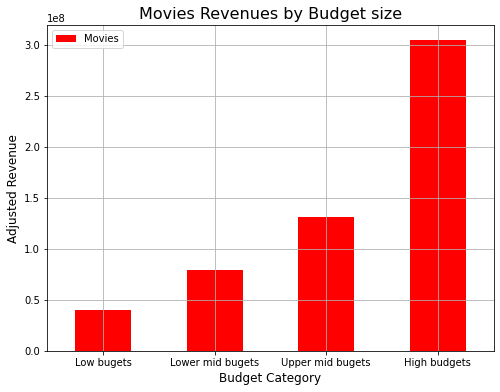

In [42]:
categories = ['Low bugets', 'Lower mid bugets', 'Upper mid bugets', 'High budgets'] # x-axis ticks labels

visualize(df_budget, 'bar' , 'Movies Revenues by Budget size', "Budget Category", 'Adjusted Revenue', 'red', 'Movies'\
          , categories); # the visualize function used to plot a bar chart to show relationship between budget and revenue sizes

> Using the visualize function created earlier in this section to visualize this table, the bar chart created above makes it clear that there is a direct positive correlation between budget and revenue. The bar chart plots the relationship between the mean revenue of the movies we previously categorized based on their budget size, which shows that the higher the budget the higher the generated revenues.

### Research Question 2 

>Studying genres vs popularity trends over the years.

>Which genres are most popular from year to year?

In [43]:
df_final.genre1.describe()

count      4748
unique       19
top       Drama
freq       1125
Name: genre1, dtype: object

>A sneak peak into the genres shows that the most recurring genre is 'Drama' out of 19 different genres available in our genre1 column values, which is considered to contain the main genre describing any of the movies on our dataframe

In [44]:
filter1 = df_final.groupby('release_year').popularity.max() # dataframe of movies with highest popularity score each year
df_most_popular_by_year = df_final.loc[df_final['popularity'].isin(filter1)]

In [45]:
df_most_popular_by_year.genre1.value_counts() # displays the count of each genre each movie belongs to on most_popular_by_year

Adventure          17
Action             10
Drama               8
Science Fiction     5
Animation           4
Crime               3
Horror              2
Romance             2
Thriller            1
Fantasy             1
Comedy              1
Family              1
Music               1
Name: genre1, dtype: int64

>In the above cell, a filter containing the highest movie popularity score for each year was created. That filter was then passed into the original dataframe to get all the column data associated with the movies scoring the highest in terms of popularity each year. 

>The table above shows the number of times a specific genre was the most popular through out the years in our data set. genre1 column data inputs only were examined as that is considerd the main genre of the movie.

In [46]:
def accumulated_trend(genre_column):
    
    """accumulated_trend function generates a compiled plot for all genre trends for the movie genres on a specific 
    genre column name over the years. It takes one argument:
    - genre_column =  the name of the column that includes the genre names in our data frame (There are 5 columns to select)
    - returns a plot showing how all genre names trend over all the years relevant to the movies in our frame """
    
    # dataframe grouping data by genre and release year and calculating the mean popularity score for that genre in each year
    df_genre_trend = df_final.groupby([genre_column, 'release_year']).popularity.mean()
    genre_names = df_genre_trend.index.get_level_values(0).unique() #list of all the unique genre names in the selected column
    
    #plots a line chart for each genre's popularity score versus each year
    for genre_ in genre_names:
        fig = df_genre_trend[genre_].plot(kind='line', figsize=(10, 8));
        
    plt.legend([genre_])
    plt.ylabel('Popularity', fontsize =12)
    plt.xlabel("Years",fontsize =12)
    plt.title('All Genre Popularity Trend by Years', fontsize =16)
    
   
    return fig

>The function above takes in the genre column name that is desired to be anayzed then returns a accumulated line plot of all the genres' popularity score trends through out all the years relevant in our dataset.

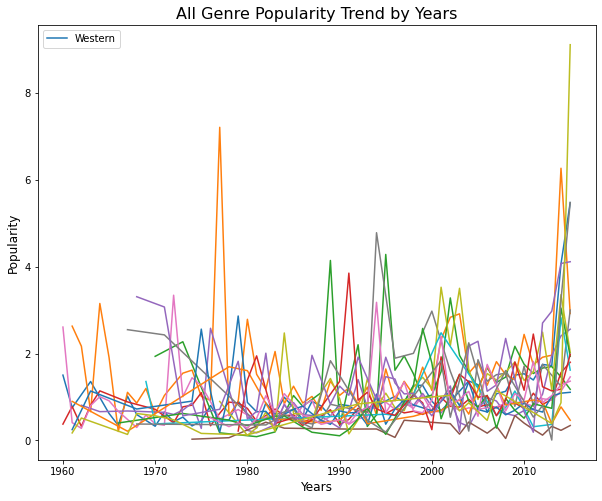

In [47]:
# using accumulated_trend function to generate a plot showing how all genre names in 'genre1' column trend over all 
# the years relevant to the movies in our frame and relative to the genres listed in 'genre1' column

accumulated_trend('genre1');

> The above is an accumulated chart showing the popularity trends of all genres listed in genre1 column through out the years 1960 to 2015. We can get a similar chart for all genres listed in other genre columns by passing the column names into the the function.

In [48]:
def genre_popularity_trend(genre_column, genre_name):
    
    """genre_popularity_trend function generates a single plot for one specific genre, showing how it trends over the years
    so we can examine that genre closely. It takes two arguments:
    - genre_column =  the name of the column that contains the genre names (there are 5 columns to select)
    - genre_name =  the name of the specific genre we want to examine and check its trending pattern over the years
    - returns a plot showing the genre trend over the years"""
    
    # dataframe grouping information by genre and release year, then calculating the mean popularity score for that genre
    # for each year
    df_trend = df_final.groupby([genre_column, 'release_year']).popularity.mean()
    
    figure = df_trend[genre_name].plot(kind = 'line', figsize=(10,8)); # plots line graph for mean popularity scores over years
    
    plt.ylabel('Popularity', fontsize =12)
    plt.xlabel("Years",fontsize =12)
    plt.title('Genre Popularity Trend by Years', fontsize =16)
    
    plt.legend([genre_name])
    
    return figure

>The function above allows to examine the indvidual genre trends throughout the years. It takes the desired genre column name and the desired genre name as input, then it returns a line plot showing how popular was the selected trend relative to the others in the selected column, through out the years from 1960 to 2015.

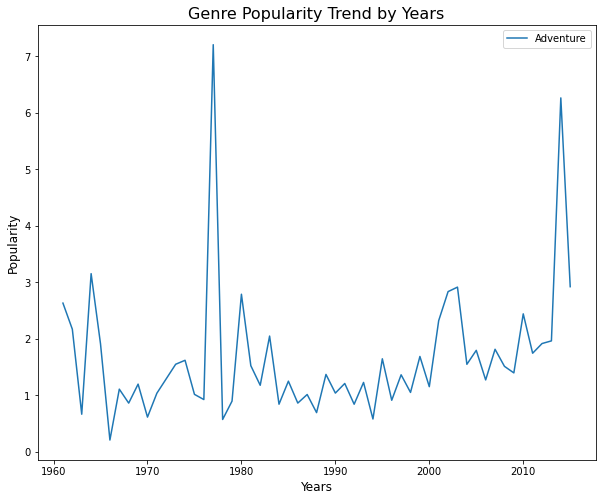

In [49]:
# using the genre_popularity_trend function to genrate a plot showing how the 'Adventure' genre trends over the years, relative
# to all the other genres listed on the column called "genre1"

genre_popularity_trend('genre1','Adventure');

>This chart is an example chart showing how popular was the genre "Adventure" through out the years, relative to all the other genres existing in the same year, throughout all the relevant years. This chart is using mean popularity values for the genres not the maximum.

<a id='conclusions'></a>
## Conclusions

> **Revenue vs release month:**
>There seems to be a sutble relationship between the relase month in the dates of movie releases and the amount of revenue generated. Upon anaylsis it was noticed that movies released around holiday seasons or vacation times have generated higher revenues than the others. This makes logical sense as people will have more time to spend in cinemas during these seasons. In holidays more childern also go to the cinemas, hence more tickets are sold and people are usually more willing to spend in those times. An additional research point here would be to find out which movie genre from which companies were responsible for these high revenue generating movies in these specific months.

>**Revenue vs Popularity:**
>The reltionship between popularity and high revenue can only be described as non-reliable. From our analysis it can be concluded that a popular movie is not necessarily a high revenue genrating one, and vice versa.

>**Revenue vs Production Companies,Directors, Actors and Genres:**
>Where it is clear from the anaylsis that these relationships are weak, however they exist. It is safe to say that some production companies are doing much better than others when it comes to makimg high revenue genrating movies (movies that genrated higher than the mean revenue value from our dataset), perhaps they have some formula or recipe that guaretees a high chance of success. Also some specific actors and some specific directors names are more associated with high revenue genrating movies than others, which may be among the factors these successful production companies consider when making their movies. When it comes to genre though, it gets a little trickier and it is better to refrain from making a conclusion.

>**Revenue vs Budget:**
>There is no doubt that according to the analysis done, the higher the movie the budget the higher the revenue it generates, which is a completely logical conclusion and opposite cases can be consided as exceptions to the rule.

>An additional revenue research point would be to find out if certain combinations of Actors, Directors, Production companies and maybe Genres are always associated with high revenue generating movies at certain periods through out the years.

>**Genre popularity trends:**
>The analysis shows how specific genres trend in terms of popularity over the years, and it is safe to say that even though some genres are definetly more popular than others throughout the overall period of years in our dataset, it is safe to conclude that no specific genre has been dominating the top spot through out the years. Genre popularity fluctuates from one year to another with out any clear pattern.

### Limitations
>**Popularity score votes:**
>A major limitation in our analysis would be that the number of votes for each movie resulting in the popularity scores are not uniform. One movie may have had 2 or 3 votes giving it high ratings and a high poularity score, while the opposite could also be true for other movies. There should be a threshhold to consider for popularity scores and number of votes, and all the movies below that threshhold should be dropped, however, that would have really decreaed the sample size if applied to this dataset.

>Another limitation maybe manifisted in the fact that alot of values were missing and the data size had to be slashed to a almost half its size, which would ofcourse reduce the overall accuracy of results.

>### Prepared by Mahmoud Badr